In [1]:
# 0.필요모듈 import
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# 1. 데이터 확인
credit_df1 = pd.read_csv('DataSet/CC_GENERAL.csv')
credit_df1.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
# 고객 정보
#   CUST_ID: 고객 아이디
# 잔액 관련 컬럼
#   BALANCE: 현재 잔액
# BALANCE_FREQUENCY: 잔액 갱신 빈도
#   구매 관련 컬럼
#   PURCHASES: 총 구매 금액
#   ONEOFF_PURCHASES: 일시불 구매 금액
#   INSTALLMENTS_PURCHASES: 할부 구매 금액
#   PURCHASES_FREQUENCY: 구매 빈도
#   ONEOFF_PURCHASES_FREQUENCY: 일시불 구매 빈도
#   PURCHASES_INSTALLMENTS_FREQUENCY: 할부 구매 빈도
#   PURCHASES_TRX: 총 구매 거래 횟수
# 현금 서비스 관련 컬럼
#   CASH_ADVANCE: 현금 서비스에 대한 금액
#   CASH_ADVANCE_FREQUENCY: 현금 서비스 빈도
#   CASH_ADVANCE_TRX: 현금 서비스 거래 횟수
# 신용 한도 관련 컬럼
#   CREDIT_LIMIT: 신용 한도
# 지불 관련 컬럼
#   PAYMENTS: 총 지불 금액
#   MINIMUM_PAYMENTS: 최소 지불 금액
#   PRC_FULL_PAYMENT: 전액 지불 비율

In [4]:
# 2. 데이터 표준화 
# 고객 아이디 제외한 고객정보 데이터 분리
credit_df2 = credit_df1.drop('CUST_ID', axis = 1)

credit_df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# PCA를 위한 각 feature표준화
scaled_credit_df2 = (credit_df2 - credit_df2.mean()) / credit_df2.std()  # 컬럼별 표준화 진행

In [6]:
# 3. PCA
# PCA 전 Scree plot analysis를 통해 각 주성분이 갖는 설명력 비율 시각화
pca = PCA(n_components = 10)
pca.fit(scaled_credit_df2)  # PCA 학습
scaled_credit_df2_pc = pca.transform(scaled_credit_df2)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_credit_df2_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.682126,-1.076390,0.488479,0.665515,0.018224,0.050626,0.829098,-0.039301,0.115333,-0.077770
1,-1.138231,2.506337,0.601179,-0.120430,0.605769,-1.136777,-0.374486,0.132403,0.687839,-0.777628
2,0.969630,-0.383499,0.102366,1.209199,-2.172463,-0.217210,-1.573170,-0.169539,-0.883678,-0.001939
3,-0.873579,0.043163,1.460085,1.151916,0.295615,-0.123682,-0.280744,-0.559067,-0.146556,0.393122
4,-1.599344,-0.688542,0.365073,0.990176,-0.487012,0.075055,0.707883,0.208387,0.584586,-0.121727


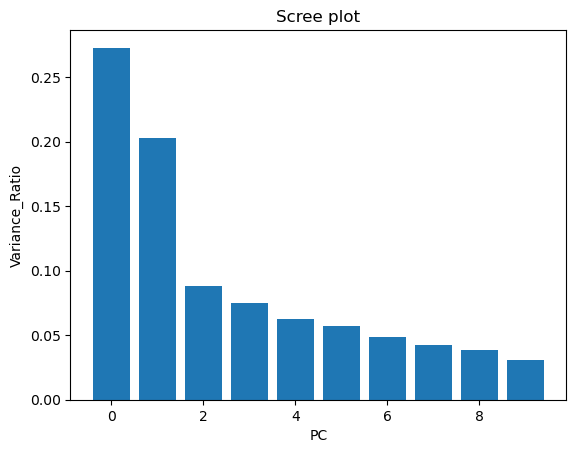

In [7]:
# explained variance ratio 가 클수록 설명력이 좋음
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_ 

plt.bar(x, var) # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

In [8]:
# 누적 분산이 일정 이상인지 확인
cum_var = np.cumsum(var)   # 누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars': cum_var}, index = pca_df.columns)

cum_vars

,cum_vars
PC1,0.272900
PC2,0.475920
PC3,0.563840
PC4,0.638640
PC5,0.701268
PC6,0.758770
PC7,0.807642
PC8,0.850217
PC9,0.888505
PC10,0.919305


In [15]:
# PCA 실행
X = scaled_credit_df2.copy()

# 객체
pca = PCA(n_components=4)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df.head()

,0,1
0,-1.682126,-1.076391
1,-1.138231,2.506337
2,0.969630,-0.383498
3,-0.873579,0.043162
4,-1.599344,-0.688542


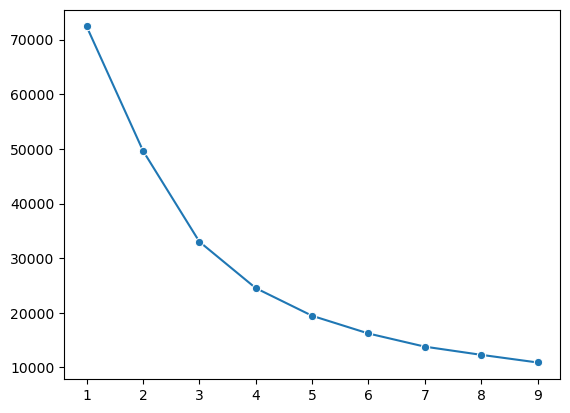

In [20]:
# 4. k-means clustering
# elbow plot
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

#시각화
sns.lineplot(x=ks, y=inertias, marker='o')

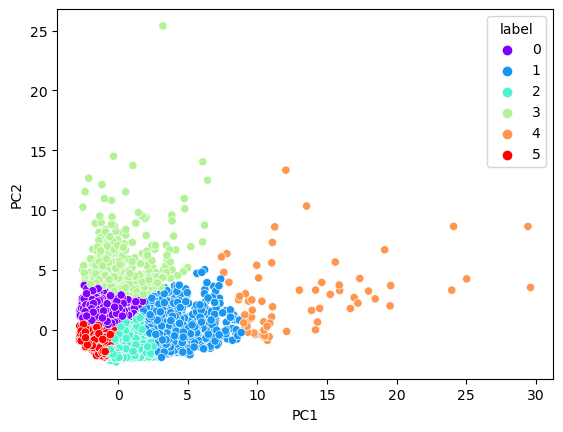

In [21]:
model = KMeans(n_clusters=6)
model.fit(pca_df)
labels = model.labels_  # 고객마다 부여할 클러스터
x, y = pca_df[0], pca_df[1]

# PCA 진행한 데이터프레임에 클러스터 번호 부여
pca_km_df = pd.DataFrame({'PC1': x, 'PC2':y, 'label':labels})

# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='label', palette='rainbow')

In [23]:
# 5. 결과 해석

# k = 6인 k-means 클러스터링 진행
model = KMeans(n_clusters=6, random_state = 111)
model.fit(pca_df)

labels=model.labels_  #고객마다 부여할 클러스터

# 원본 데이터에 클러스터 부여
credit_df1['cluster'] = labels

credit_df1['CUST_ID'].groupby(credit_df1['cluster']).count()


cluster
0     942
1    2980
2     431
3    1580
4    2949
5      68
Name: CUST_ID, dtype: int64

In [24]:
credit_df1.groupby(credit_df1['cluster']).mean().T

cluster,0,1,2,3,4,5
BALANCE,2377.128446,752.840196,6204.108979,2894.414305,653.028910,5094.163240
BALANCE_FREQUENCY,0.984349,0.765732,0.977807,0.948006,0.900883,0.977139
PURCHASES,3889.792442,212.189852,708.445568,267.821076,947.616229,17046.403235
ONEOFF_PURCHASES,2432.561879,154.415151,451.321462,185.518924,435.348976,11458.830147
INSTALLMENTS_PURCHASES,1457.867505,58.131134,257.279443,82.338051,512.572709,5587.573088
CASH_ADVANCE,502.737101,378.877176,6947.708667,2387.107874,104.251218,1246.094188
PURCHASES_FREQUENCY,0.952202,0.181288,0.332345,0.190118,0.828495,0.949510
ONEOFF_PURCHASES_FREQUENCY,0.660313,0.071704,0.168825,0.090456,0.240079,0.773908
PURCHASES_INSTALLMENTS_FREQUENCY,0.770525,0.103170,0.224401,0.107092,0.646225,0.835183
CASH_ADVANCE_FREQUENCY,0.074165,0.084142,0.589569,0.352214,0.024358,0.095588


In [25]:
credit_df1.groupby(credit_df1['cluster']).mean().T.iloc[[0,1],]

cluster,0,1,2,3,4,5
BALANCE,2377.128446,752.840196,6204.108979,2894.414305,653.028910,5094.163240
BALANCE_FREQUENCY,0.984349,0.765732,0.977807,0.948006,0.900883,0.977139
